In [1]:
import tensorflow.keras as keras

In [2]:
import tensorflow as tf

print(tf.__version__)


1.15.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2621 - acc: 0.9237
Epoch 2/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1091 - acc: 0.9664
Epoch 3/3
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0901 - acc: 0.9725
0.09005945645552128
0.9725


In [8]:
model.save('epic_num_reader.model')


#new_model = tf.keras.models.load_model('epic_num_reader.model')
#finally, make predictions!

predictions = model.predict(x_test)
print(predictions)

[[1.19158980e-11 1.68881584e-08 1.88251431e-06 ... 9.99997139e-01
  5.17283034e-08 9.68062608e-09]
 [6.20458751e-09 6.47488996e-05 9.99874949e-01 ... 1.72477643e-09
  5.60793616e-08 9.67845526e-11]
 [1.28607344e-05 9.89790738e-01 7.05848506e-05 ... 2.54975725e-03
  6.22799899e-03 3.47427340e-05]
 ...
 [5.60389846e-10 3.90913641e-07 3.29507550e-08 ... 1.28613465e-05
  1.72854300e-06 2.13254927e-04]
 [3.72848694e-06 1.16922784e-07 4.69305587e-06 ... 2.20584297e-06
  2.73099891e-03 5.54957458e-09]
 [1.70686519e-06 9.25692945e-08 1.61883250e-07 ... 4.09572404e-10
  1.80283143e-06 1.11758105e-07]]


In [12]:
import numpy as np

print(np.argmax(predictions[9]))





9


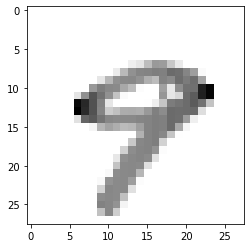

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9],cmap=plt.cm.binary)
plt.show()